## Traffic Violation

In [12]:
# Import Statements
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the data

In [13]:
df = pd.read_csv("Traffic_Violations.csv", dtype = 'object')

## 1. Plot a histogram for Violation Type

In [14]:
x = df['Violation Type'].value_counts()

In [15]:
labels = list(x.keys())

In [16]:
count = list(range(len(labels)))

## Combined Plot of all the Violations

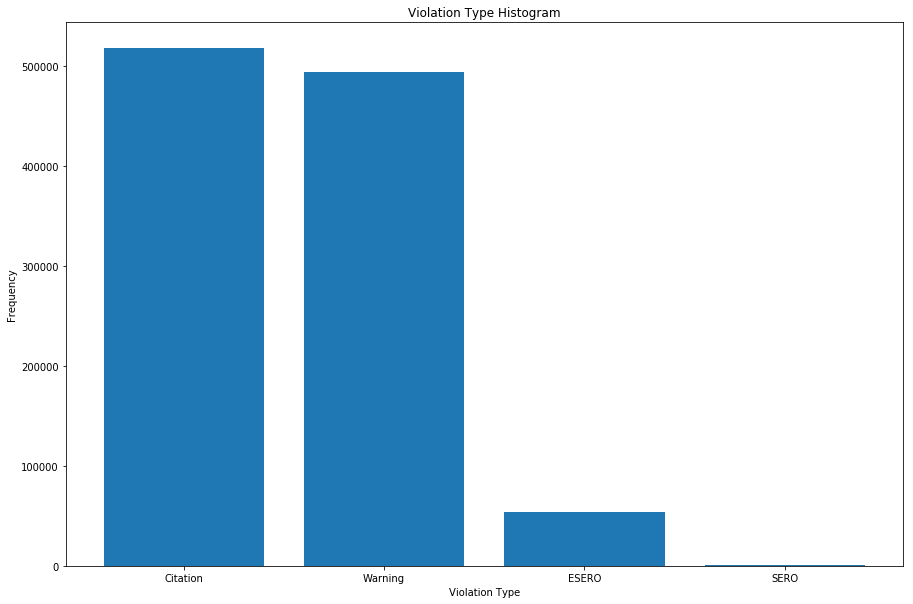

In [17]:
fig = plt.figure(figsize=(15,10))
plt.bar(count,x)
plt.xticks(count,labels)
plt.title("Violation Type Histogram")
plt.xlabel("Violation Type")
plt.ylabel("Frequency")
plt.show()

## Plotting for the first two Violations [Citation, Warning]

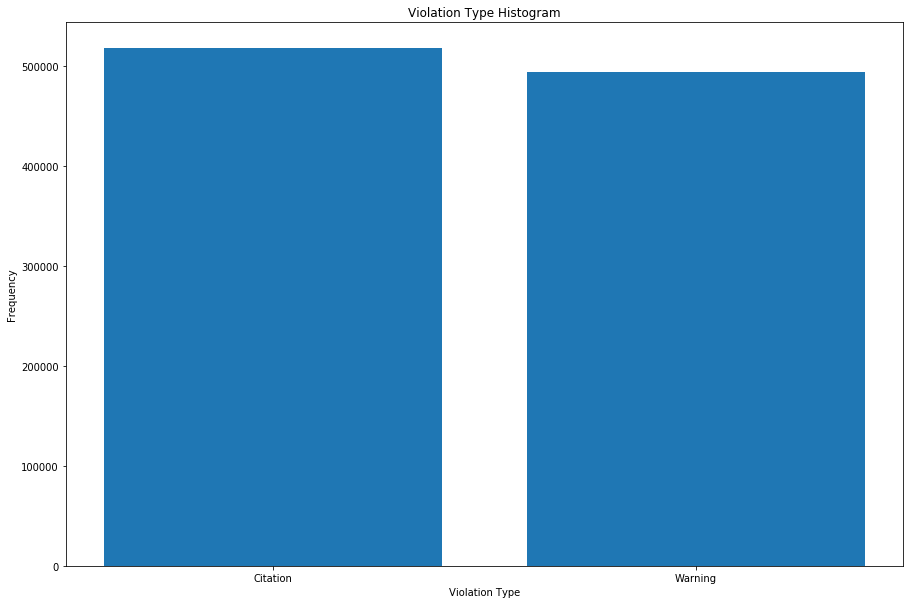

In [18]:
fig = plt.figure(figsize=(15,10))
plt.bar(count[0:2],x[0:2])
plt.xticks(count[0:2],labels[0:2])
plt.title("Violation Type Histogram")
plt.xlabel("Violation Type")
plt.ylabel("Frequency")
plt.show()

## Plotting for the other two Violations [ESERO, SERO]

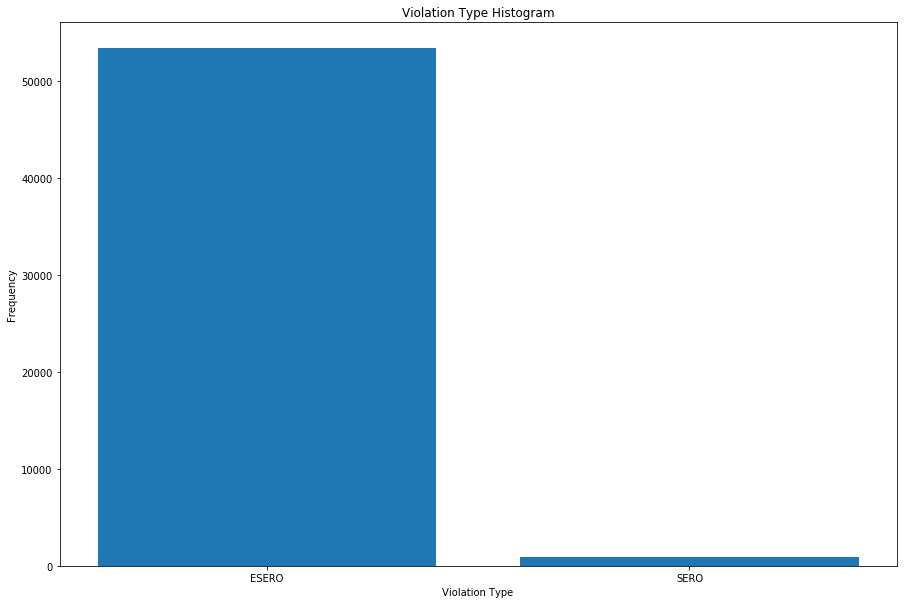

In [19]:
fig = plt.figure(figsize=(15,10))
plt.bar(count[2:4],x[2:4])
plt.xticks(count[2:4],labels[2:4])
plt.title("Violation Type Histogram")
plt.xlabel("Violation Type")
plt.ylabel("Frequency")
plt.show()

## 2. Group by Location and plot the Number of Violations for the period 2013 to 2015

In [20]:
df_stopdate_loc = df[['Date Of Stop', 'Location']]


In [21]:
df_date = pd.to_datetime(df_stopdate_loc['Date Of Stop'])
df_stopdate_loc['Year of Violation'] = pd.Series(df_date.dt.year)


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [22]:
df_year = df_stopdate_loc[(df_stopdate_loc['Year of Violation'] >= 2013) & (df_stopdate_loc['Year of Violation'] <= 2015)]

In [23]:
group_loc = df_year.groupby(['Location'])['Year of Violation'].value_counts()

In [24]:
unstacked_group_loc = group_loc.unstack()

In [25]:
df_unstacked_group = pd.DataFrame(unstacked_group_loc).fillna(0)

In [26]:
df_unstacked_group_reshape = df_unstacked_group[0:25]

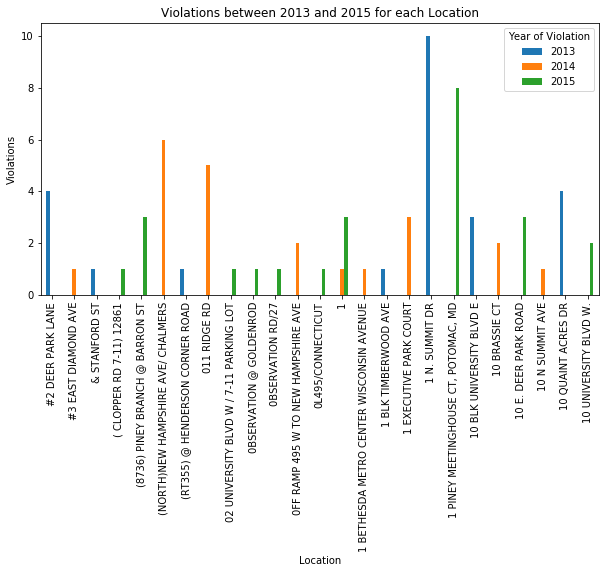

In [28]:
df_unstacked_group_reshape.plot(kind = 'bar', figsize=[10,5])
plt.title("Violations between 2013 and 2015 for each Location")
plt.ylabel('Violations')

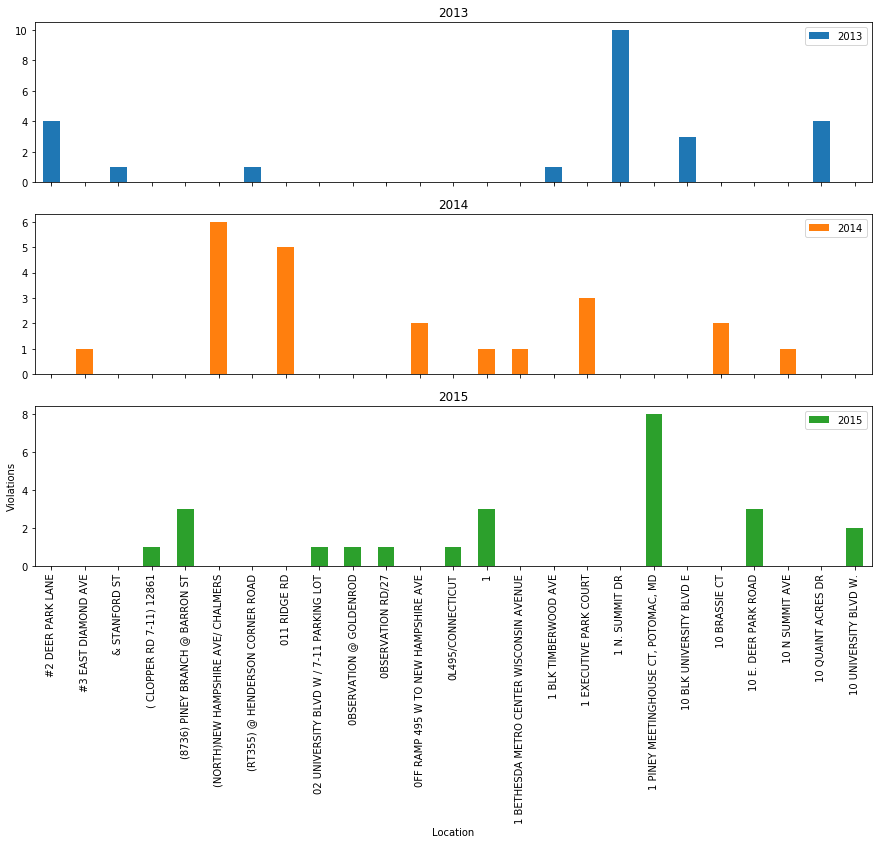

In [30]:
df_unstacked_group_reshape.plot(kind = 'bar', subplots = True, figsize=[15,10])
#plt.title("Violations between 2013 and 2015 for each Location")
plt.ylabel('Violations')

## 3. Plot the aggregated Number of Violations first by District followed by Race

In [31]:
group_district = df.groupby(['SubAgency']).Race.value_counts()

In [32]:
unstacked_group_district = group_district.unstack()

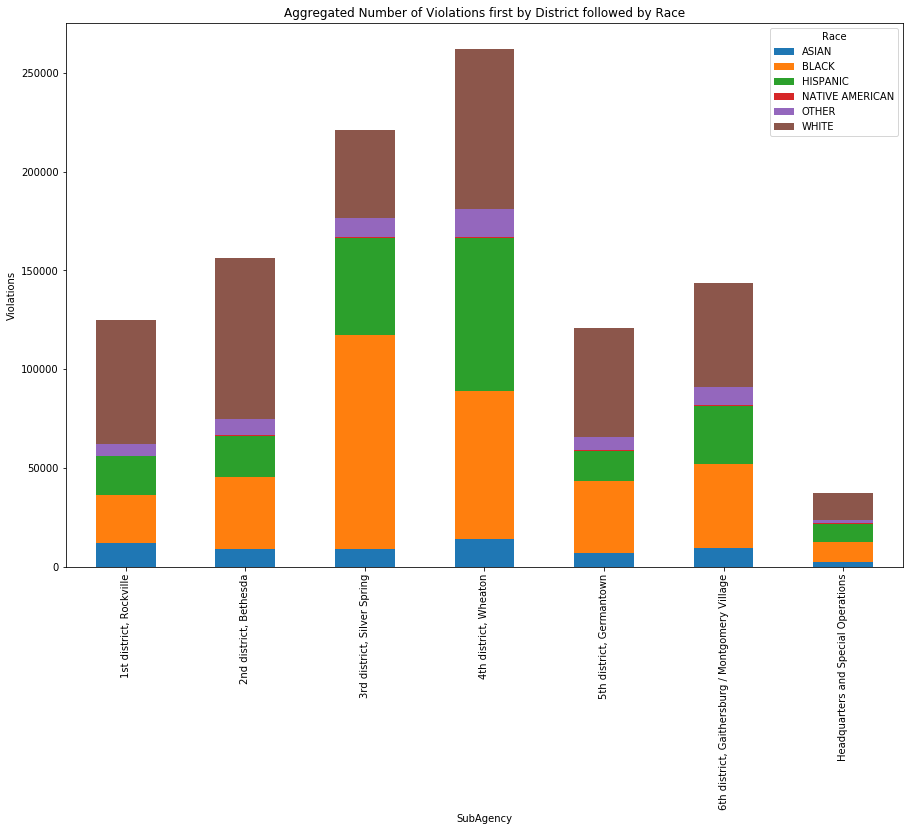

In [33]:
unstacked_group_district.plot(kind = 'bar', stacked = True, figsize=[15,10])
plt.title('Aggregated Number of Violations first by District followed by Race')
plt.ylabel('Violations')